# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [77]:
# Checking the number of mice.
combined_data.columns
mice_count = combined_data["Mouse ID"].nunique()
mice_count

249

In [78]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
combined_data["Duplicated ID and Timepoint"]= combined_data.duplicated(subset=["Mouse ID","Timepoint"])
duplicate_df = combined_data.loc[combined_data["Duplicated ID and Timepoint"]== True]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated ID and Timepoint
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated ID and Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [80]:
# Checking the number of mice in the clean DataFrame.
mice_count = combined_data["Mouse ID"].nunique()
mice_count

249

## Summary Statistics

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = combined_data[["Drug Regimen","Tumor Volume (mm3)"]]
drug_regimen_summary = drug_regimen_df.groupby("Drug Regimen").mean()
drug_regimen_summary = drug_regimen_summary.rename(columns = {"Tumor Volume (mm3)": "Mean"})
drug_regimen_summary["Median"] = drug_regimen_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_regimen_summary["Variance"] = drug_regimen_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_regimen_summary["Standard Deviation"] = drug_regimen_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_regimen_summary["SEM"] = drug_regimen_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
drug_regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
combined_data.groupby("Drug Regimen").agg( Mean = ("Tumor Volume (mm3)","mean"),
                                          Median = ("Tumor Volume (mm3)","median"),
                                          Var = ("Tumor Volume (mm3)","var"),
                                          STD = ("Tumor Volume (mm3)","std"),
                                          SEM = ("Tumor Volume (mm3)","sem")
                                         )

,Mean,Median,Var,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

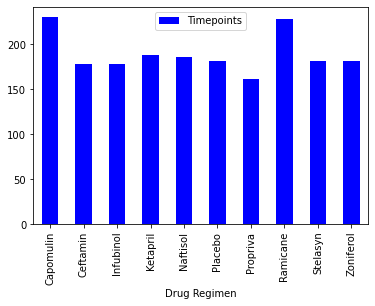

In [83]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_df = combined_data.groupby("Drug Regimen").agg( Timepoints = ("Timepoint","count"))
timepoint_df.plot(kind = "bar", color =  "blue")


In [84]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


<AxesSubplot:ylabel='Count'>

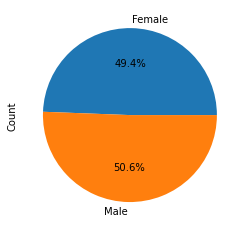

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = combined_data.groupby("Sex").agg(Count = ("Mouse ID","count"))
gender_df.plot( kind = "pie", x = "Sex", y = "Count", autopct = "%1.1f%%", legend = False)


In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_data = combined_data.loc[(combined_data["Drug Regimen"]== "Capomulin")|(combined_data["Drug Regimen"]== "Ramicane")|(combined_data["Drug Regimen"]== "Infubinol")| (combined_data["Drug Regimen"]== "Ceftamin")]
final_tumor_data = final_tumor_data.sort_values(by =["Mouse ID", "Timepoint"], ascending = [True, True])
final_tumor_volume = final_tumor_data.drop_duplicates(subset ="Mouse ID",keep = "last")
final_tumor_volume = final_tumor_volume[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
final_tumor_volume.rename(columns = {"Tumor Volume (mm3)": "Final Volume"})
combined_data = pd.merge(combined_data, final_tumor_volume, on = ["Mouse ID", "Drug Regimen"], how ="left")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Duplicated ID and Timepoint,Tumor Volume (mm3)_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,False,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,False,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,False,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,False,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,False,22.050126
...,...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False,NaN
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False,NaN
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False,NaN
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False,NaN


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for r in regimen:
    quartiles =combined_data["Tumor Volume (mm3)_x"].loc[combined_data["Drug Regimen"]== r].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier = combined_data["Tumor Volume (mm3)_x"].loc[((combined_data["Drug Regimen"]== r) 
                                                        & (combined_data["Tumor Volume (mm3)_x"] > upper_bound)) | 
                                                        ((combined_data["Drug Regimen"]== r) 
                                                        & (combined_data["Tumor Volume (mm3)_x"] < lower_bound))]
    print (f"{r}: {outlier}")
    
    

Capomulin: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3)_x, dtype: float64
Ramicane: 9    22.050126
Name: Tumor Volume (mm3)_x, dtype: float64
Infubinol: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Ceftamin: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


In [90]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.




## Line and Scatter Plots

In [91]:
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Duplicated ID and Timepoint,Tumor Volume (mm3)_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,False,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,False,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,False,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,False,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,False,22.050126


In [92]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_c = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") &
                                                               (combined_data["Mouse ID"] == "i738"),:]
mouse_c = mouse_c[["Timepoint","Tumor Volume (mm3)_x"]]
mouse_c


,Timepoint,Tumor Volume (mm3)_x
195,0,45.000000
196,5,45.595685
197,10,43.421014
198,15,37.978778
199,20,38.531136
200,25,34.973438
201,30,35.578780
202,35,36.175953
203,40,36.843898
204,45,37.311846


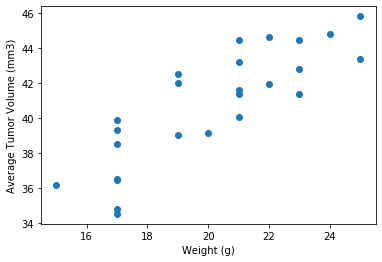

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


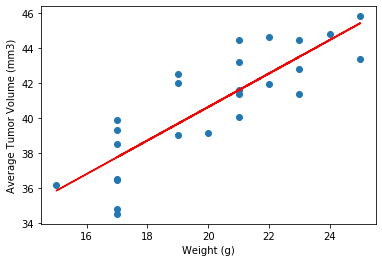

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

